Import the necessary packages /modules and read the data set

In [454]:
#21BAI1778
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import scipy.stats
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [455]:
#21BAI1778
df = pd.read_csv("data.csv")
df

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,user_26159,NaN,Virginia,NaN,Raman,NaN,3242 Coralie Drive,NaN,Sydney,New South Wales,...,1957-07-10,Partial College,Skilled Manual,F,S,1,1,0,1,78246
1,user_11748,NaN,Blake,NaN,Hill,NaN,1315 Norse Drive,NaN,Victoria,British Columbia,...,1958-07-18,Graduate Degree,Professional,M,M,1,1,4,5,92987
2,user_25780,NaN,Dana,M,Gill,NaN,Roßstr 9928,NaN,Leipzig,Nordrhein-Westfalen,...,1944-06-05,Partial College,Professional,F,S,0,2,0,5,87805
3,user_16198,NaN,Arthur,NaN,Navarro,NaN,6607 Panoramic Avenue,NaN,Cheltenham,England,...,1972-10-13,High School,Manual,M,S,1,1,0,0,32050
4,user_22931,NaN,Logan,K,Johnson,NaN,4945 Pennsylvania Blvd.,NaN,Caloundra,Queensland,...,1928-03-02,Graduate Degree,Management,M,M,0,1,0,5,136024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,user_12852,NaN,Teresa,L,Carlson,NaN,Westheimer Straße 6,NaN,Stuttgart,Saarland,...,1979-02-04,Partial College,Clerical,F,S,1,1,3,3,43479
95,user_24012,NaN,James,F,Lewis,NaN,"17, rue de Varenne",NaN,Bobigny,Seine Saint Denis,...,1960-05-12,High School,Manual,M,S,0,0,1,1,24141
96,user_17572,NaN,Lucas,L,Edwards,NaN,1233 RiverRock Dr.,NaN,Coronado,California,...,1969-05-08,Bachelors,Skilled Manual,M,S,1,0,2,2,68703
97,user_19561,NaN,Orlando,NaN,Serrano,NaN,5439 Mcelroy Court,NaN,Lane Cove,New South Wales,...,1970-05-20,Bachelors,Professional,M,M,1,0,0,2,125013


In [456]:
#21BAI1778
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            99 non-null     object 
 1   Title                 0 non-null      float64
 2   FirstName             99 non-null     object 
 3   MiddleName            63 non-null     object 
 4   LastName              99 non-null     object 
 5   Suffix                0 non-null      float64
 6   AddressLine1          99 non-null     object 
 7   AddressLine2          2 non-null      object 
 8   City                  99 non-null     object 
 9   StateProvinceName     99 non-null     object 
 10  CountryRegionName     99 non-null     object 
 11  PostalCode            99 non-null     object 
 12  PhoneNumber           99 non-null     object 
 13  BirthDate             99 non-null     object 
 14  Education             99 non-null     object 
 15  Occupation            99 

In [457]:
#21BAI1778
df.describe()

,Title,Suffix,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,0.0,0.0,99.000000,99.000000,99.000000,99.000000,99.000000
mean,NaN,NaN,0.707071,1.474747,1.101010,2.343434,77700.323232
std,NaN,NaN,0.457422,1.181001,1.746688,1.863514,40864.785207
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,13326.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,1.000000,46471.000000
50%,NaN,NaN,1.000000,1.000000,0.000000,2.000000,72260.000000
75%,NaN,NaN,1.000000,2.000000,2.000000,4.000000,111140.000000
max,NaN,NaN,1.000000,4.000000,5.000000,5.000000,185180.000000


# 1 Data Pre-processing and EDA		(15 Marks)

In [458]:
#21BAI1778
#1.1
df.isnull().sum()

CustomerID               0
Title                   99
FirstName                0
MiddleName              36
LastName                 0
Suffix                  99
AddressLine1             0
AddressLine2            97
City                     0
StateProvinceName        0
CountryRegionName        0
PostalCode               0
PhoneNumber              0
BirthDate                0
Education                0
Occupation               0
Gender                   0
MaritalStatus            0
HomeOwnerFlag            0
NumberCarsOwned          0
NumberChildrenAtHome     0
TotalChildren            0
YearlyIncome             0
dtype: int64

In [459]:
#21BAI1778
#1.1
#  numericals with mean
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

#  categorical mode
categorical_columns = df.select_dtypes(include='object').columns.tolist()
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

numerical_columns

['Title',
 'Suffix',
 'HomeOwnerFlag',
 'NumberCarsOwned',
 'NumberChildrenAtHome',
 'TotalChildren',
 'YearlyIncome']

In [460]:
categorical_columns

['CustomerID',
 'FirstName',
 'MiddleName',
 'LastName',
 'AddressLine1',
 'AddressLine2',
 'City',
 'StateProvinceName',
 'CountryRegionName',
 'PostalCode',
 'PhoneNumber',
 'BirthDate',
 'Education',
 'Occupation',
 'Gender',
 'MaritalStatus']

In [461]:
#21BAI1778
#1.1
df.isnull().sum()

CustomerID               0
Title                   99
FirstName                0
MiddleName               0
LastName                 0
Suffix                  99
AddressLine1             0
AddressLine2             0
City                     0
StateProvinceName        0
CountryRegionName        0
PostalCode               0
PhoneNumber              0
BirthDate                0
Education                0
Occupation               0
Gender                   0
MaritalStatus            0
HomeOwnerFlag            0
NumberCarsOwned          0
NumberChildrenAtHome     0
TotalChildren            0
YearlyIncome             0
dtype: int64

By observartion all the values of "Suffix" , "Title" are empty or close to nothing  
we can DROP them.

In [462]:
#21BAI1778
#1.1
df = df.drop(columns =['Suffix', 'Title'])

In [463]:
#21BAI1778
#1.1
df.isnull().sum()

CustomerID              0
FirstName               0
MiddleName              0
LastName                0
AddressLine1            0
AddressLine2            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
dtype: int64

In [464]:
#21BAI1778
#df['Humidity'] = df['Humidity'].astype(float)

# 1.2.	List out the first name of the customers who lives in a state province “England” and the Education is Bachelors

In [465]:
#21BAI1778
#1.2
idx = df[df['StateProvinceName'] == "England"].index
print(df.FirstName[idx])
# and df['Education'] == "Bachelors"

3        Arthur
14          Joy
18         Kyle
21        Louis
35      Gilbert
53    Dominique
62      Brianna
76        Tammy
Name: FirstName, dtype: object


In [466]:
#21BAI1778
#1.2
idx = df[df['Education'] == "Bachelors"].index
print(df.FirstName[idx])

Series([], Name: FirstName, dtype: object)


In [467]:
#21BAI1778
#1.2
filtered_data = df[(df['StateProvinceName'] == 'England') & (df['Education'] == 'Bachelors')]
filtered_data

,CustomerID,FirstName,MiddleName,LastName,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome


# 1.3.	Visualize the Occupation of the customer with the proper chart.

In [468]:
#21BAI1778
#1.3
df['Occupation'].unique()

array(['Skilled Manual', 'Professional', 'Manual', 'Management',
       'Clerical'], dtype=object)

only 5 types of occupations, hence only 5 parts in pie chart.

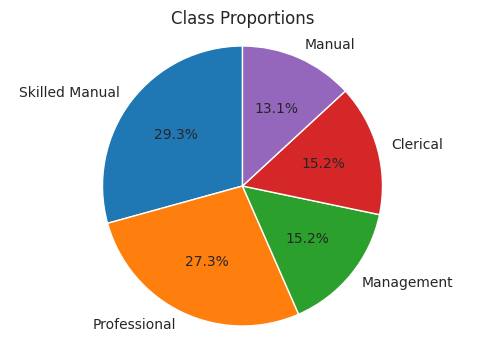

In [469]:
#21BAI1778
#pie chart
#1.3
class_proportions = df['Occupation'].value_counts(normalize=True)
plt.figure(figsize=(6, 4))
plt.pie(class_proportions, labels=class_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Proportions')
plt.axis('equal')
plt.show()

# 2 Building Model

# 2.1	Write the problem statement to perform the regression. The problem statement should be more sensible without any ambiguity. (5 Marks)

STATEMENT:

For a given scenario and avalaible values of attributes predict the target which is salary

In [470]:
#21BAI1778
#2.2
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()

In [471]:
#21BAI1778
#2.2
df_encoded = df
columns_to_encode = categorical_columns
le = LabelEncoder()
for column in columns_to_encode:
    df_encoded[column] = le.fit_transform(df_encoded[column])

In [472]:
#21BAI1778
#2.2
df_encoded

,CustomerID,FirstName,MiddleName,LastName,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,91,86,0,51,26,0,71,10,0,0,...,33,3,4,0,1,1,1,0,1,78246
1,4,15,0,25,5,0,74,1,1,75,...,37,1,3,1,0,1,1,4,5,92987
2,88,29,10,17,93,0,35,12,3,19,...,12,3,3,0,1,0,2,0,5,87805
3,28,12,0,44,52,0,9,3,4,67,...,81,2,2,1,1,1,1,0,0,32050
4,72,64,8,28,36,0,8,14,0,22,...,1,1,1,1,0,0,1,0,5,136024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,13,84,9,8,95,0,70,15,3,32,...,95,3,0,0,1,1,1,3,3,43479
95,75,46,4,34,9,0,5,17,2,48,...,40,2,2,1,1,0,0,1,1,24141
96,38,66,9,14,3,0,14,2,5,45,...,69,0,4,1,1,1,0,2,2,68703
97,49,77,0,62,42,0,34,10,0,3,...,75,0,3,1,0,1,0,0,2,125013


In [473]:
#21BAI1778
#2.2
x  = df_encoded.drop(columns =['YearlyIncome'])
y  = df_encoded['YearlyIncome']

In [474]:
#21BAI1778
#2.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

classifier.fit(x_train, y_train)

LinearRegression()

In [475]:
#21BAI1778
#2.2
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (79, 20)
Training Labels Shape: (79,)
Testing Features Shape: (20, 20)
Testing Labels Shape: (20,)


In [476]:
#21BAI1778
#2.2
print('x_train shape type: ', type(x_train))
print('y_train shape type: ', type(y_train))
print('x_test shape type: ', type(x_test))
print('y_test shape type: ', type(y_test))

x_train shape type:  <class 'pandas.core.frame.DataFrame'>
y_train shape type:  <class 'pandas.core.series.Series'>
x_test shape type:  <class 'pandas.core.frame.DataFrame'>
y_test shape type:  <class 'pandas.core.series.Series'>


Model Metrics

In [477]:
#21BAI1778
#2.3
y_pred = classifier.predict(x_test)

In [478]:
#21BAI1778
#2.3
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

30421.13789391466

In [479]:
#21BAI1778
#2.3
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1634710802.8077397

In [480]:
#21BAI1778
#2.3
from sklearn.metrics import r2_score
m1 = r2_score(y_test, y_pred)
m1

0.17125922850572783

# Model Comparison


3.1	Build another model (M2) and Compare the same with your previous model 1. (5 Marks)

In [481]:
#21BAI1778
#3.1
df_encoded = df_encoded.drop(columns =['CustomerID', 'FirstName',	'MiddleName',	'LastName'])
x  = df_encoded.drop(columns =['YearlyIncome'])
y  = df_encoded['YearlyIncome']



In [482]:
#21BAI1778
#3.1
df_encoded

,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,26,0,71,10,0,0,43,33,3,4,0,1,1,1,0,1,78246
1,5,0,74,1,1,75,54,37,1,3,1,0,1,1,4,5,92987
2,93,0,35,12,3,19,17,12,3,3,0,1,0,2,0,5,87805
3,52,0,9,3,4,67,4,81,2,2,1,1,1,1,0,0,32050
4,36,0,8,14,0,22,19,1,1,1,1,0,0,1,0,5,136024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,0,70,15,3,32,24,95,3,0,0,1,1,1,3,3,43479
95,9,0,5,17,2,48,38,40,2,2,1,1,0,0,1,1,24141
96,3,0,14,2,5,45,49,69,0,4,1,1,1,0,2,2,68703
97,42,0,34,10,0,3,15,75,0,3,1,0,1,0,0,2,125013


In [483]:
#21BAI1778
#3.1
x

,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren
0,26,0,71,10,0,0,43,33,3,4,0,1,1,1,0,1
1,5,0,74,1,1,75,54,37,1,3,1,0,1,1,4,5
2,93,0,35,12,3,19,17,12,3,3,0,1,0,2,0,5
3,52,0,9,3,4,67,4,81,2,2,1,1,1,1,0,0
4,36,0,8,14,0,22,19,1,1,1,1,0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,0,70,15,3,32,24,95,3,0,0,1,1,1,3,3
95,9,0,5,17,2,48,38,40,2,2,1,1,0,0,1,1
96,3,0,14,2,5,45,49,69,0,4,1,1,1,0,2,2
97,42,0,34,10,0,3,15,75,0,3,1,0,1,0,0,2


In [484]:
#21BAI1778
#3.1
y

0      78246
1      92987
2      87805
3      32050
4     136024
       ...  
94     43479
95     24141
96     68703
97    125013
98    114953
Name: YearlyIncome, Length: 99, dtype: int64

In [485]:
#21BAI1778
#3.1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

classifier.fit(x_train, y_train)

LinearRegression()

In [486]:
#21BAI1778
#3.1
y_pred = classifier.predict(x_test)

In [487]:
#21BAI1778
#3.1
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

28762.828161686008

In [488]:
#21BAI1778
#3.1
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1417420285.6601949

In [489]:
#21BAI1778
#3.1
from sklearn.metrics import r2_score
m2 = r2_score(y_test, y_pred)
m2

0.2814178636049447

# 4 Best Model  				(5 Marks)
4.1	Best Model will be awarded based on the metrics.

To compare a regression model we have our metrics and on basis of that we will decide which one is better.

In [490]:
#21BAI1778
#4.1
print(m1)
print(m2)

0.17125922850572783
0.2814178636049447


# on the basis of property of R2 we can conclude the better model as follows

In [491]:
#21BAI1778
#4.1
if(m1>m2):
  print("model 1 is better that model 2.")
elif(m2>m1):
  print("model 2 is better that model 1.")

model 2 is better that model 1.
